# Задание 1. Знакомство с данными и EDA

В этом домашнем задании мы будем работать с данными по рынку недвижимости в Нью-Йорке. Перед тем как проводить дата-анализ наших данных, необходимо провести разведочный анализ данных.

In [27]:
# Импортируем библиотеки и данные
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

ny_housing = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_01_visualization/data/NY-House-Dataset.csv")
ny_housing = ny_housing[ny_housing['PRICE'] <= 200000000]
ny_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


## Задание 1.1 Построить разные графики и сделать 6 выводов
На этом этапе нам нужно выявить с помощью визуализаций разные паттерны и зависимости, распределение значений внутри переменных.

Создайте 6 визуализаций разных видов. Можно использовать графики из галерей Matplotlib или Seaborn. Полученные графики отобразите и сохраните в отдельные переменные.

Каждый график должен иметь все стандартные аттрибуты - подписи осей, название и другие необходимые детали.

NB: Визуализация должна иметь смысл и нести новую информацию.



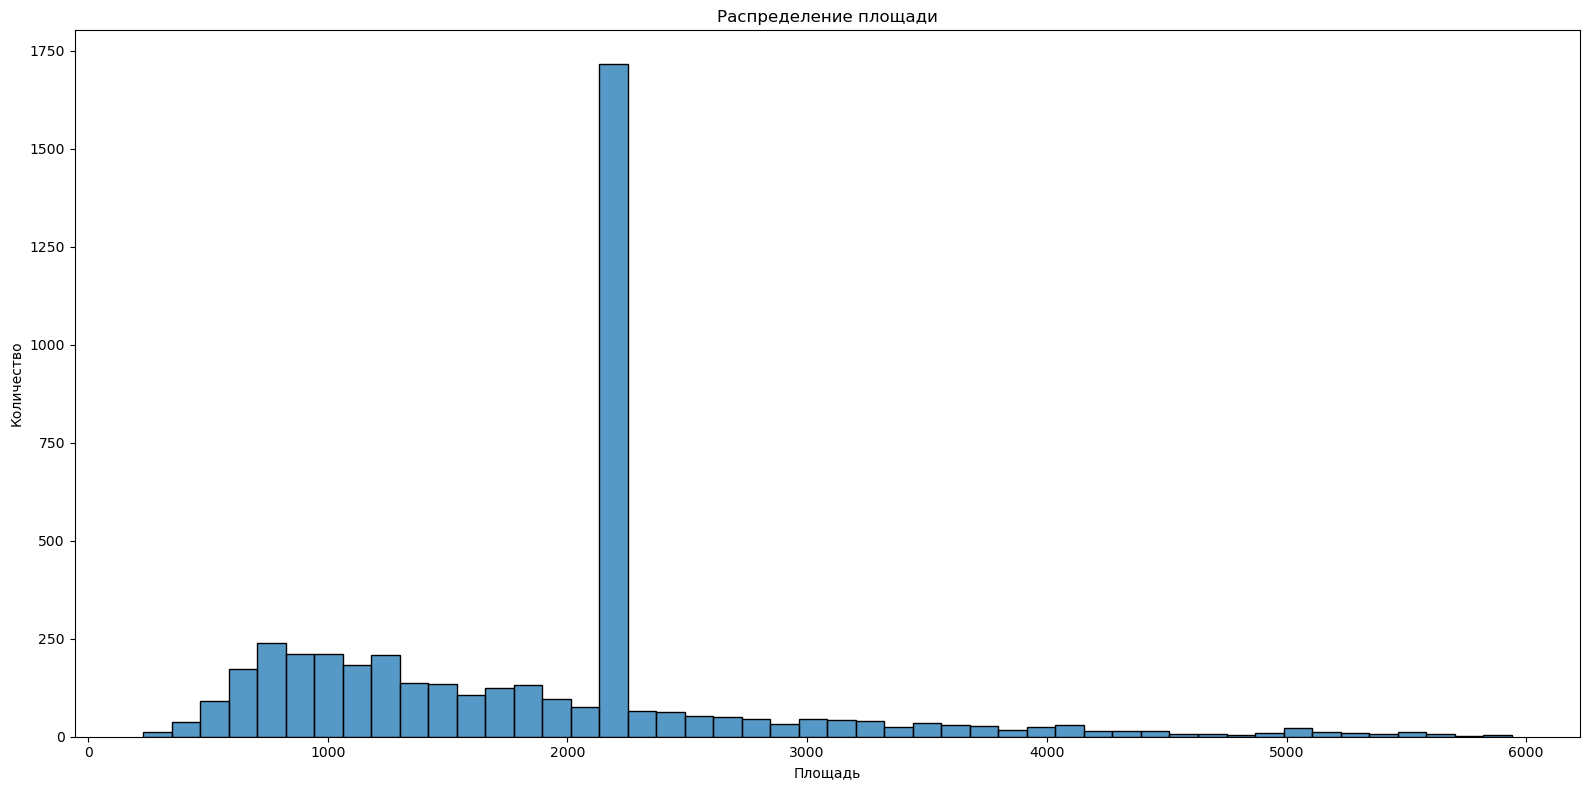

In [28]:
plt.figure(figsize=(16, 8))

sq_hist = sns.histplot(x='PROPERTYSQFT', data=ny_housing[ny_housing['PROPERTYSQFT'] < 6000])
sq_hist.set_title('Распределение площади')
sq_hist.set_xlabel('Площадь')
sq_hist.set_ylabel('Количество')
plt.tight_layout()
plt.show()

/home/andrei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


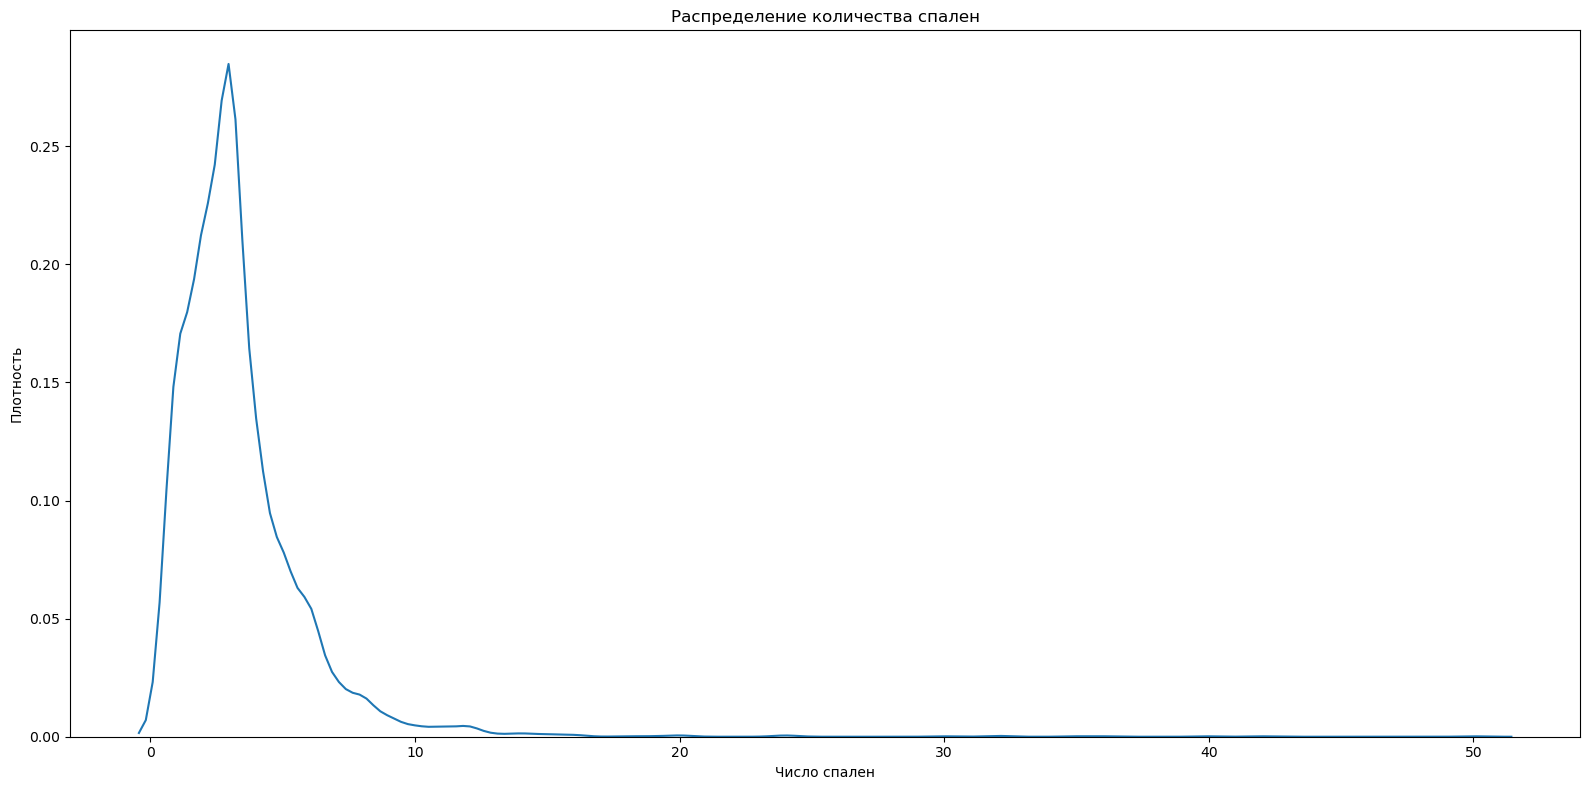

In [3]:
plt.figure(figsize=(16, 8))

beds_density = sns.kdeplot(data=ny_housing, x="BEDS")
beds_density.set_title("Распределение количества спален")
beds_density.set_xlabel("Число спален")
beds_density.set_ylabel("Плотность")
plt.tight_layout()
plt.show()

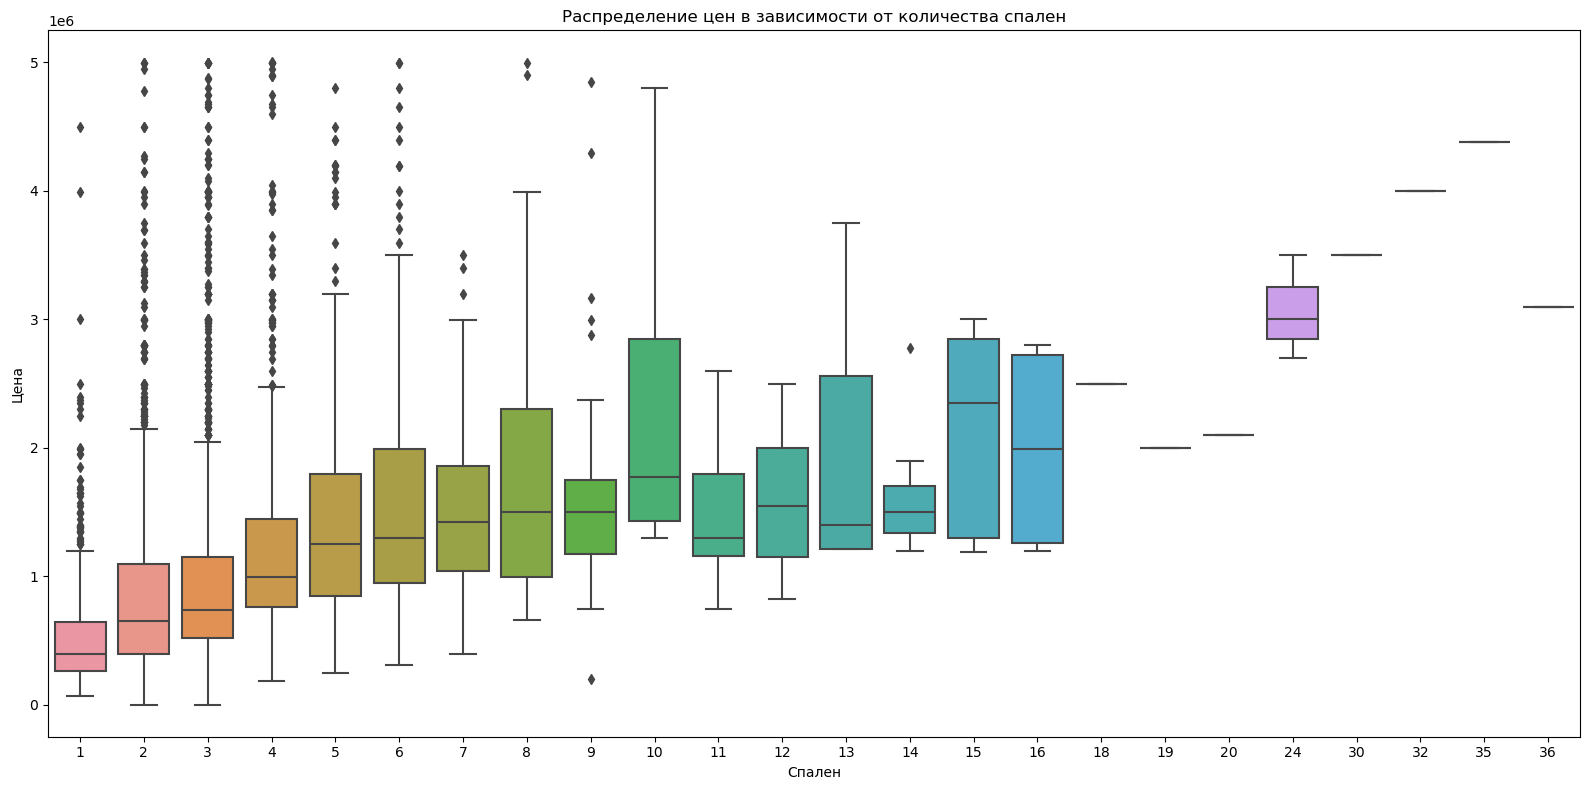

In [4]:
plt.figure(figsize=(16, 8))

box = sns.boxplot(x='BEDS', y='PRICE', data=ny_housing[ny_housing['PRICE'] < 5000000])
box.set_title('Распределение цен в зависимости от количества спален')
box.set_xlabel('Спален')
box.set_ylabel('Цена')
plt.tight_layout()
plt.show()

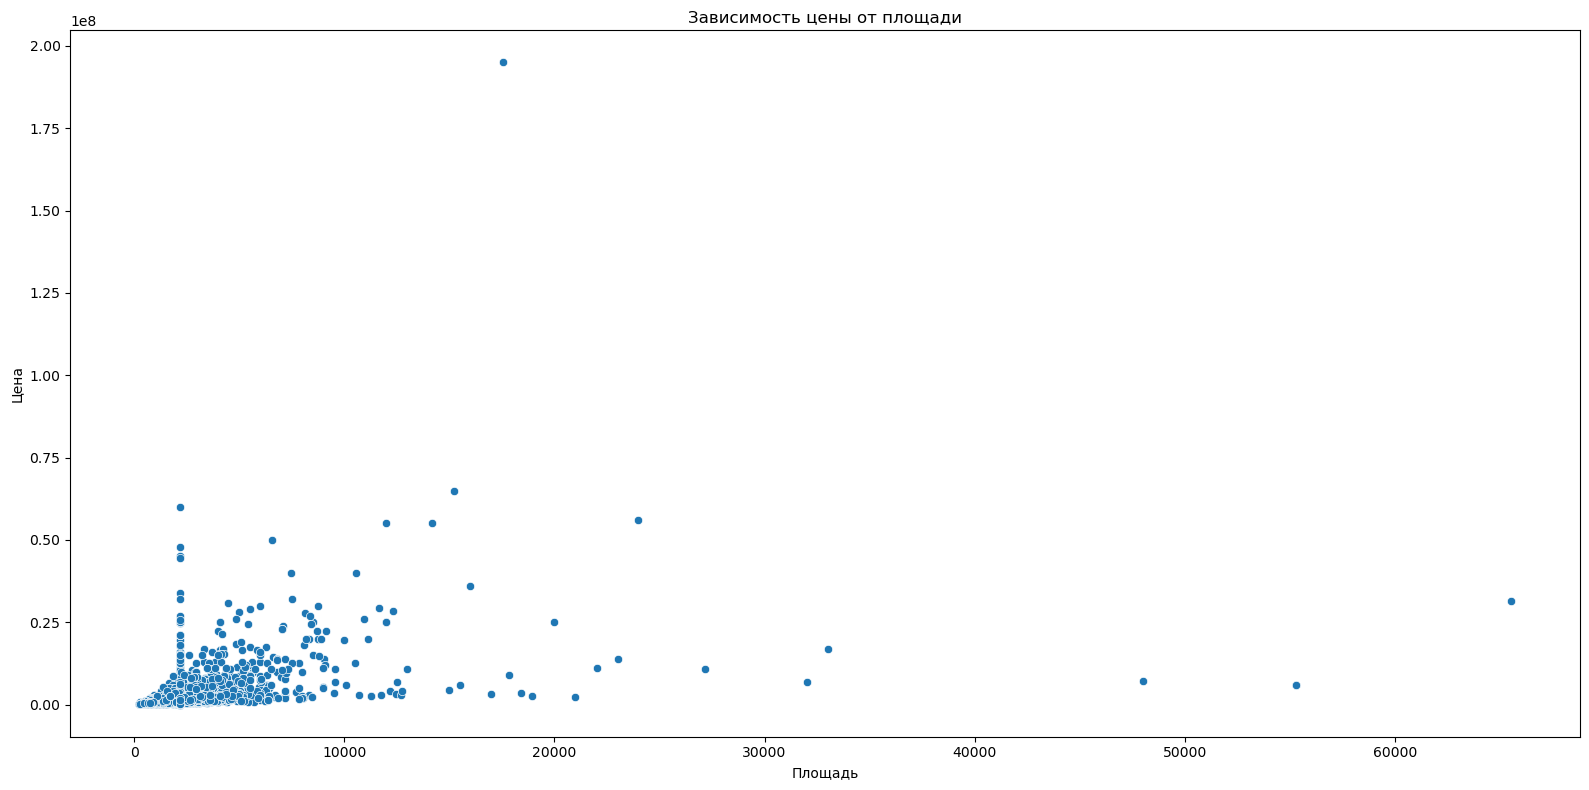

In [5]:
plt.figure(figsize=(16, 8))

scatter = sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing)
scatter.set_title('Зависимость цены от площади')
scatter.set_xlabel('Площадь')
scatter.set_ylabel('Цена')
plt.tight_layout()
plt.show()

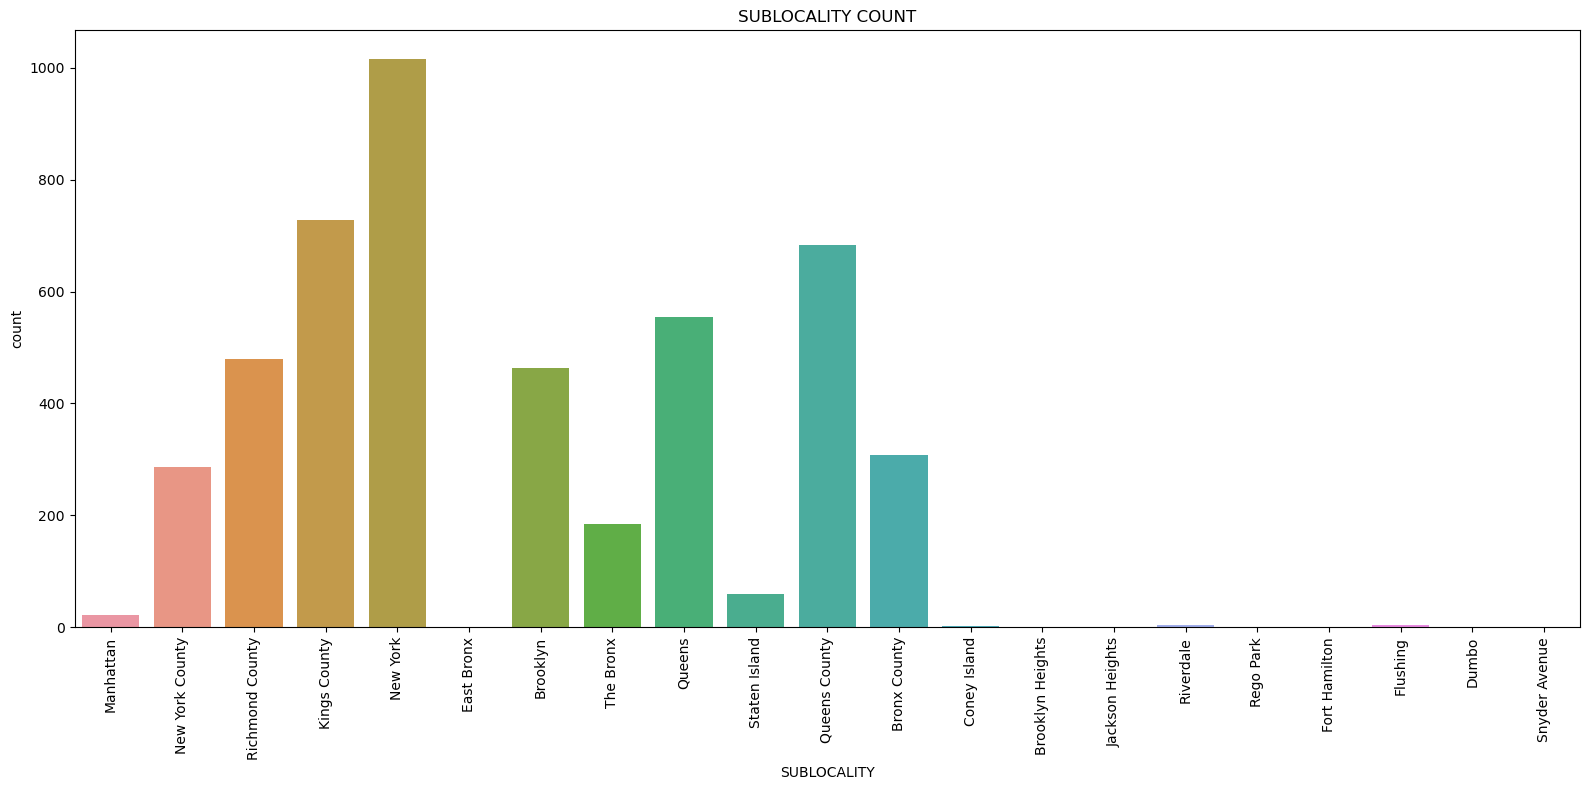

In [6]:
plt.figure(figsize=(16, 8))

subloc_count = sns.countplot(x='SUBLOCALITY', data=ny_housing)
subloc_count.set_title('SUBLOCALITY COUNT')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

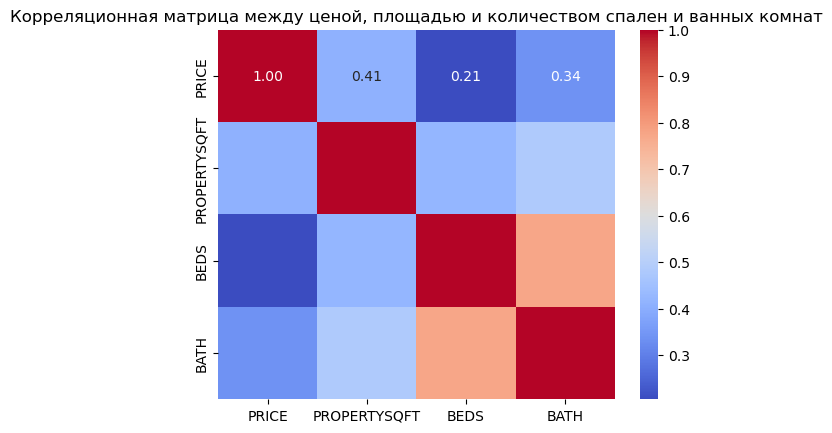

In [141]:
corr_matrix = ny_housing[['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']].corr()
heat = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
heat.set_title("Корреляционная матрица между ценой, площадью и количеством спален и ванных комнат")
plt.show()

## Задание 1.2 Сбор дашборда
В рамках модуля мы научились использовать функцию plt.subplots для создания "полотна" с целью отображения нескольких графиков на одном поле. Создайте полотно размером 3x2 (три строки и два столбца). На этом полотне изобразите все графики, которые ранее были созданы в Задании 1.1.

In [14]:
sq_hist

<Axes: title={'center': 'Распределение площади'}, xlabel='Площадь', ylabel='Количество'>

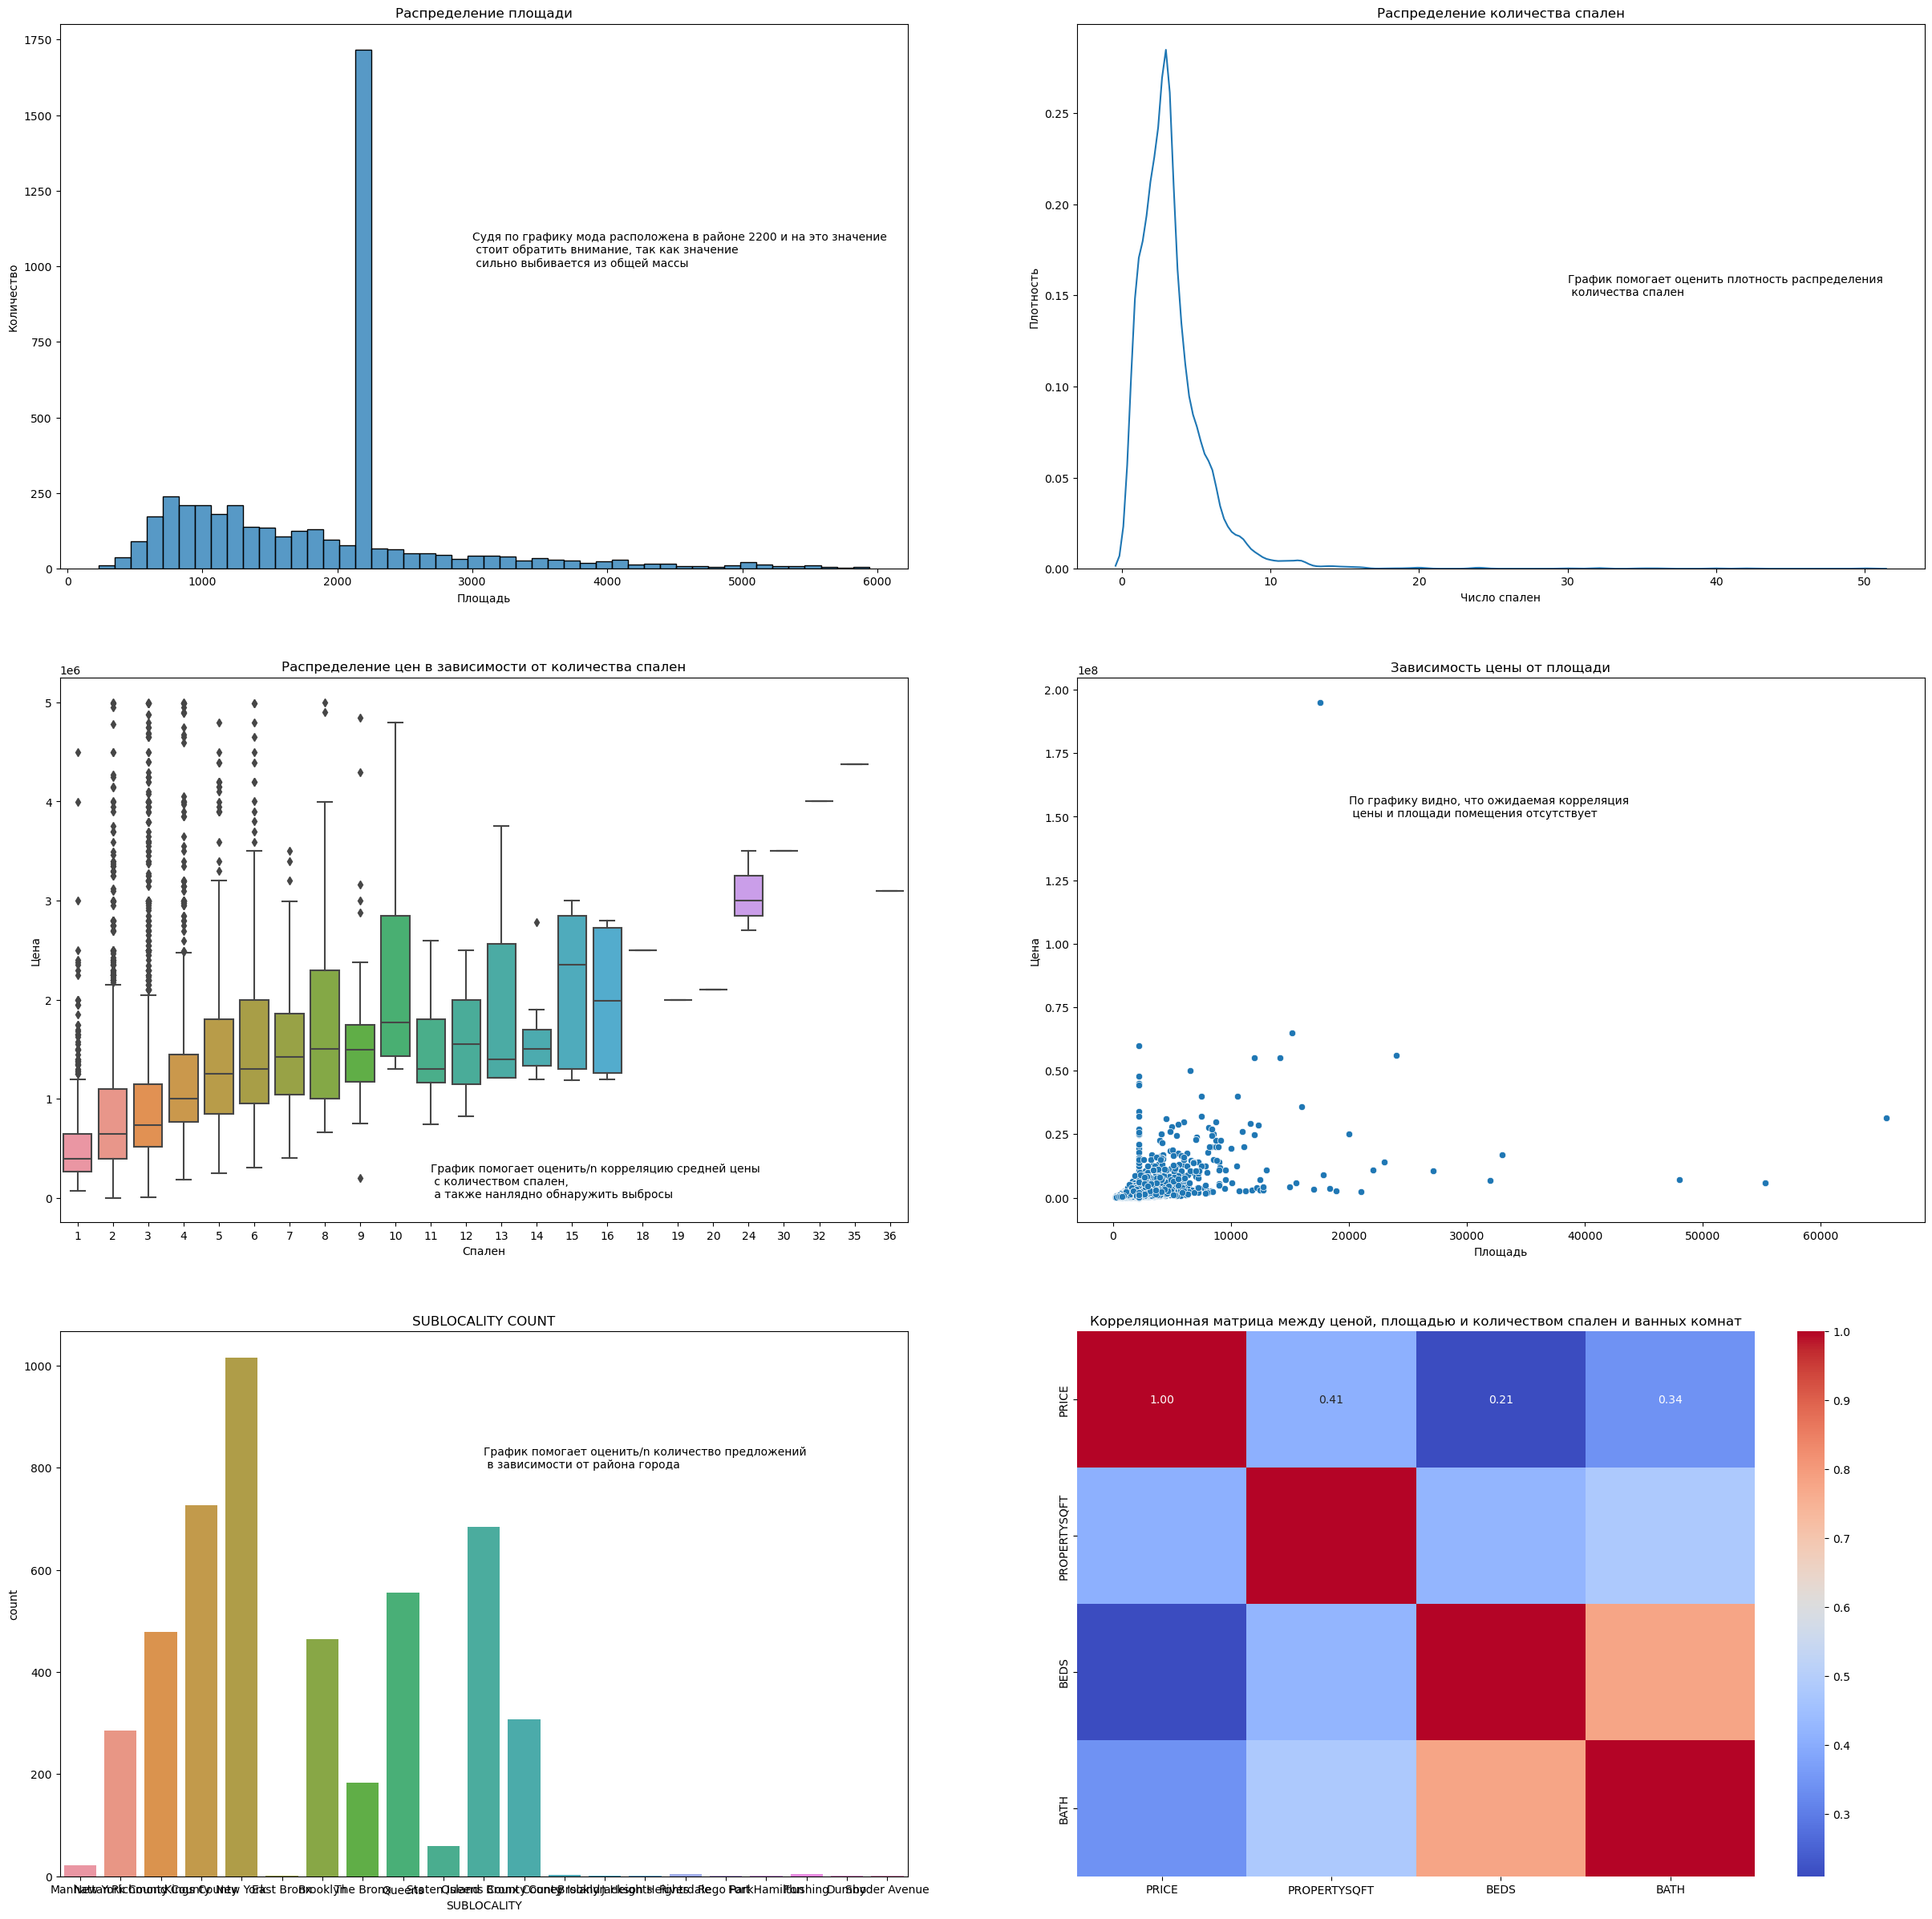

In [59]:
fig,axes = plt.subplots(3,2, sharex=False, squeeze=False, figsize=(30,30))

sns.histplot(ax=axes[0, 0], x='PROPERTYSQFT', data=ny_housing[ny_housing['PROPERTYSQFT'] < 6000])
axes[0,0].set_title('Распределение площади')
axes[0,0].set_xlabel('Площадь')
axes[0,0].set_ylabel('Количество')
axes[0,0].text(3000, 1000, 'Судя по графику мода расположена в районе 2200 и на это значение\n стоит обратить внимание, так как значение\n сильно выбивается из общей массы')

sns.kdeplot(ax=axes[0, 1], data=ny_housing, x="BEDS")
axes[0,1].set_title('Распределение количества спален')
axes[0,1].set_xlabel("Число спален")
axes[0,1].set_ylabel("Плотность")
axes[0,1].text(30, 0.15, 'График помогает оценить плотность распределения\n количества спален')

sns.boxplot(ax=axes[1, 0], x='BEDS', y='PRICE', data=ny_housing[ny_housing['PRICE'] < 5000000])
axes[1,0].set_title('Распределение цен в зависимости от количества спален')
axes[1,0].set_xlabel('Спален')
axes[1,0].set_ylabel('Цена')
axes[1,0].text(10, 1, 'График помогает оценить/n корреляцию средней цены\n с количеством спален,\n а также нанлядно обнаружить выбросы')

sns.scatterplot(ax=axes[1,1], x='PROPERTYSQFT', y='PRICE', data=ny_housing)
axes[1,1].set_title('Зависимость цены от площади')
axes[1,1].set_xlabel('Площадь')
axes[1,1].set_ylabel('Цена')
axes[1,1].text(20000, 150000000, 'По графику видно, что ожидаемая корреляция\n цены и площади помещения отсутствует')

sns.countplot(ax=axes[2,0], x='SUBLOCALITY', data=ny_housing)
axes[2,0].set_title('SUBLOCALITY COUNT')
axes[2,0].text(10, 800, 'График помогает оценить/n количество предложений\n в зависимости от района города')

heat = sns.heatmap(ax=axes[2,1], data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
axes[2,1].set_title("Корреляционная матрица между ценой, площадью и количеством спален и ванных комнат")

plt.show()

## Задание 1.3
Интерпретируйте полученные результаты. К каждому графику напишите описание - какую полезную информацию мы получили в результате использования этой визуализации. Постарайтесь сделать это максимально подробно и полно.

Описание добавлено на графики

## Задание 1.4 Как район влияет на стоимость жилья?
В наших данных есть столбец TYPE, отвечающий за тип проданной недвижимости (квартира, дом, таунхаус и т.д.).

Создайте barplot, на котором будет показана средняя стоимость недвижимости разных типов в New York County (столбец SUBLOCALITY).

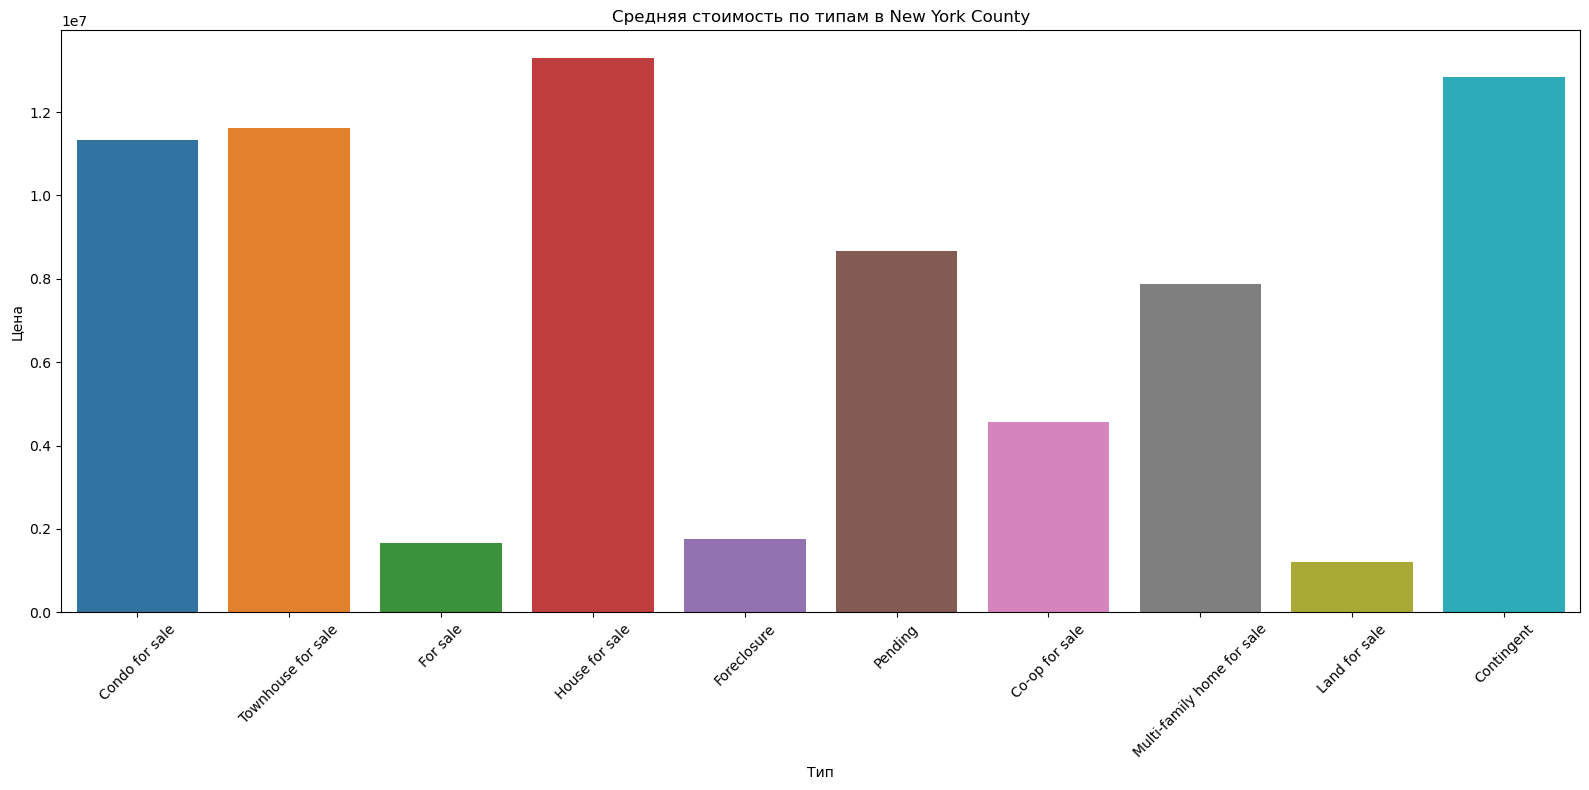

In [145]:
plt.figure(figsize=(16, 8))

sns.barplot(x='TYPE', y='PRICE', data=ny_housing[ny_housing['SUBLOCALITY'] == 'New York County'], errorbar=None)
plt.title('Средняя стоимость по типам в New York County')
plt.xlabel('Тип')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Задание 1.5 Какой тип квартир самый популярный в разных районах?
В столбце SUBLOCALITY указан район расположения объектов недвижимости. Всего в этом столбце 21 разных районов. Однако некоторые из них содержат слишком маленькое количество наблюдений.

Оставьте только те районы (столбец SUBLOCALITY), количество наблюдений в которых больше или равно 100.
Для оставшихся районов сделайте barh plot, в котором для каждого района будет указана доля квартир разных видов (столбец TYPE).
Полученные значения отсортируйте по убыванию по доле квартир (Condo for sale).
Подсказка: аналогичный алгоритм мы рассматривали на лекции в ходе вычисления доли женщин, берущих кредит.

Отлично! Теперь мы ориентируемся в данных, понимаем их структуру и особенности. Можно переходить к очистке от выбросов перед созданием модели.



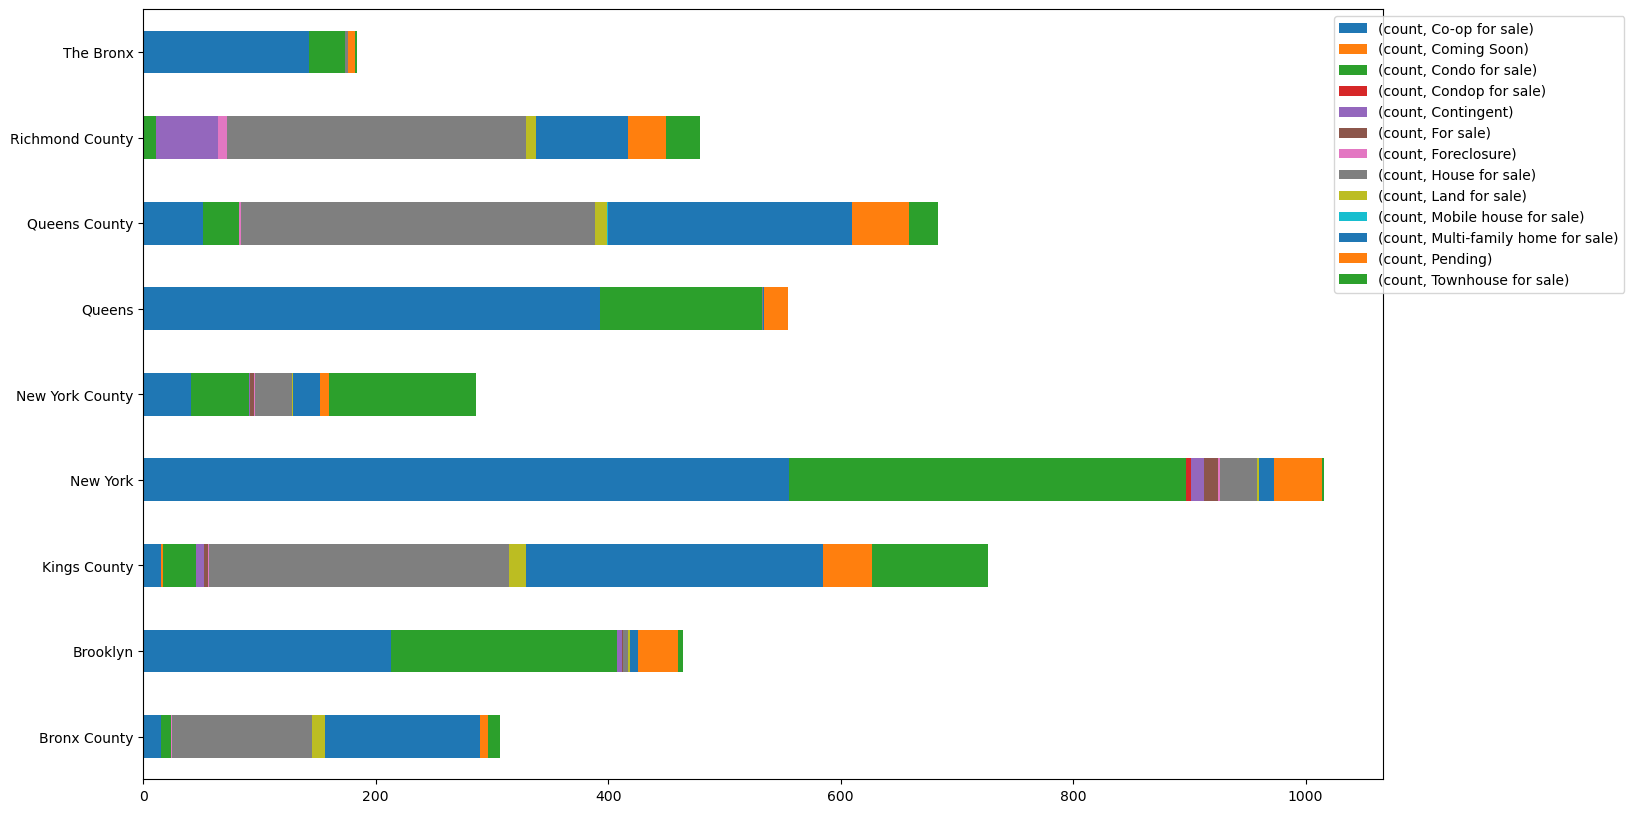

In [111]:
sublocalities_dict = ny_housing['SUBLOCALITY'].value_counts().to_dict()
sublocalities_gt_100 = [subloc for subloc in sublocalities_dict.keys() if sublocalities_dict[subloc] > 100]
sublocalities_gt_100_df = ny_housing[ny_housing['SUBLOCALITY'].isin(sublocalities_gt_100)]
sublocalities_by_type = sublocalities_gt_100_df.groupby(['SUBLOCALITY', 'TYPE']).agg({'TYPE': 'count'}).rename(columns={'TYPE': 'count'}).unstack('TYPE').fillna(0)
plot = sublocalities_by_type.plot.barh(figsize=(16,10), stacked=True)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1))
plot.set(ylabel=None, xlabel=None)
plt.show()

# Задание 2. Работа с выбросами

## Задание 2.1 Поиск выбросов
В нашем датасете есть два признака, в которых могут находиться выбросы — PRICE и PROPERTYSQFT

Почему их не может быть в других числовых переменных?
Используя boxplot идентифицируйте выбросы в обеих переменных в зависимости от типа недвижимости (TYPE).

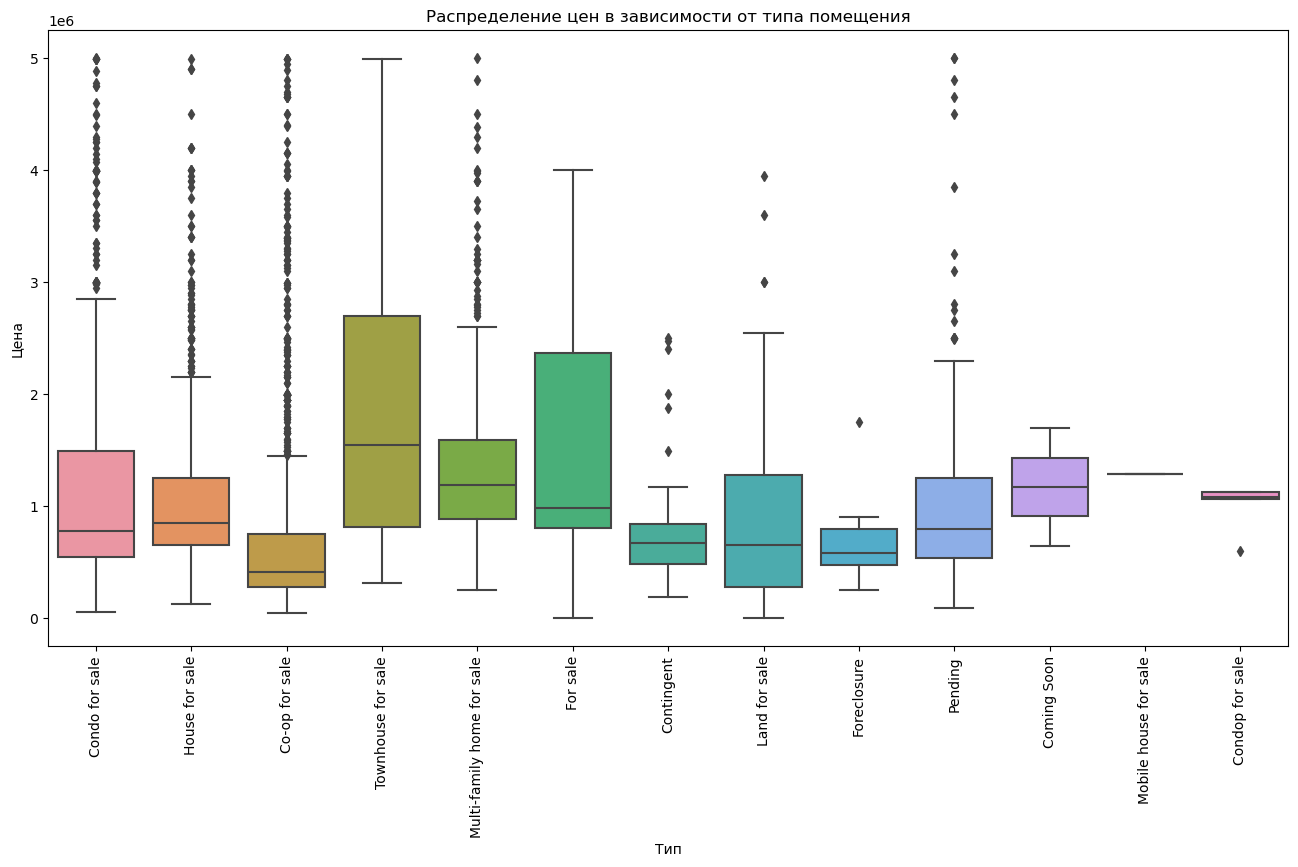

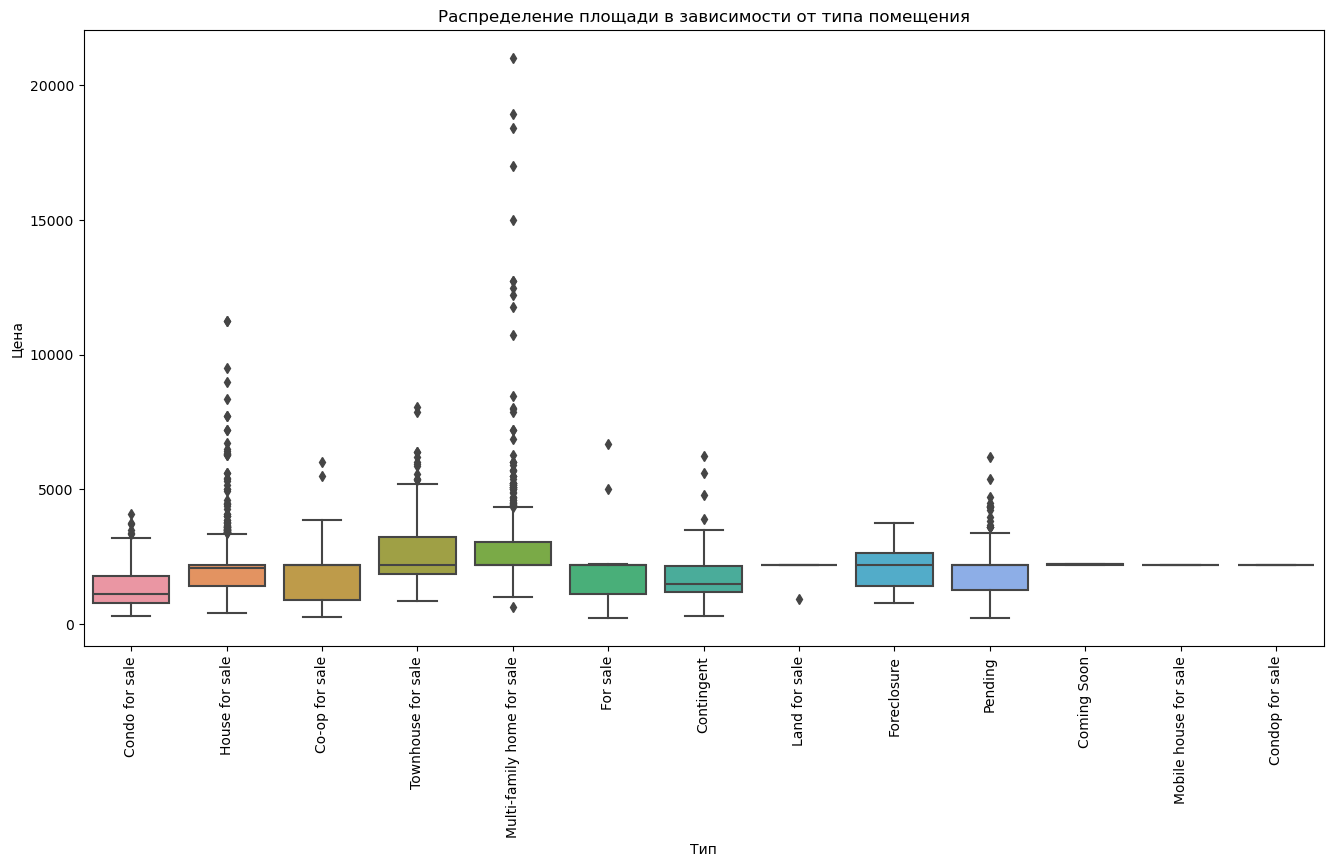

In [122]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='TYPE', y='PRICE', data=ny_housing[ny_housing['PRICE'] < 5000000])
plt.title('Распределение цен в зависимости от типа помещения')
plt.xlabel('Тип')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16, 8))

sns.boxplot(x='TYPE', y='PROPERTYSQFT', data=ny_housing[ny_housing['PRICE'] < 5000000])
plt.title('Распределение площади в зависимости от типа помещения')
plt.xlabel('Тип')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.show()

## Задание 2.2 Удаление выбросов
Удалите выбросы в датасете по переменной PRICE, которые были обнаружены в задании 2.1.

После удаления выведите bar plot, который будет визуализировать среднюю стоимость недвижимости в зависимости от типа недвижимости.

## Задание 2.3 Поиск выбросов с помощью правила трёх сигм
С помощью правила трех сигм найдите, какие значения являются экстремальными (выбросами) в столбце PROPERTYSQFT. Результат выведите в текстовом виде и сравните с результатом, полученным с помощью box plot в задании 2.1.

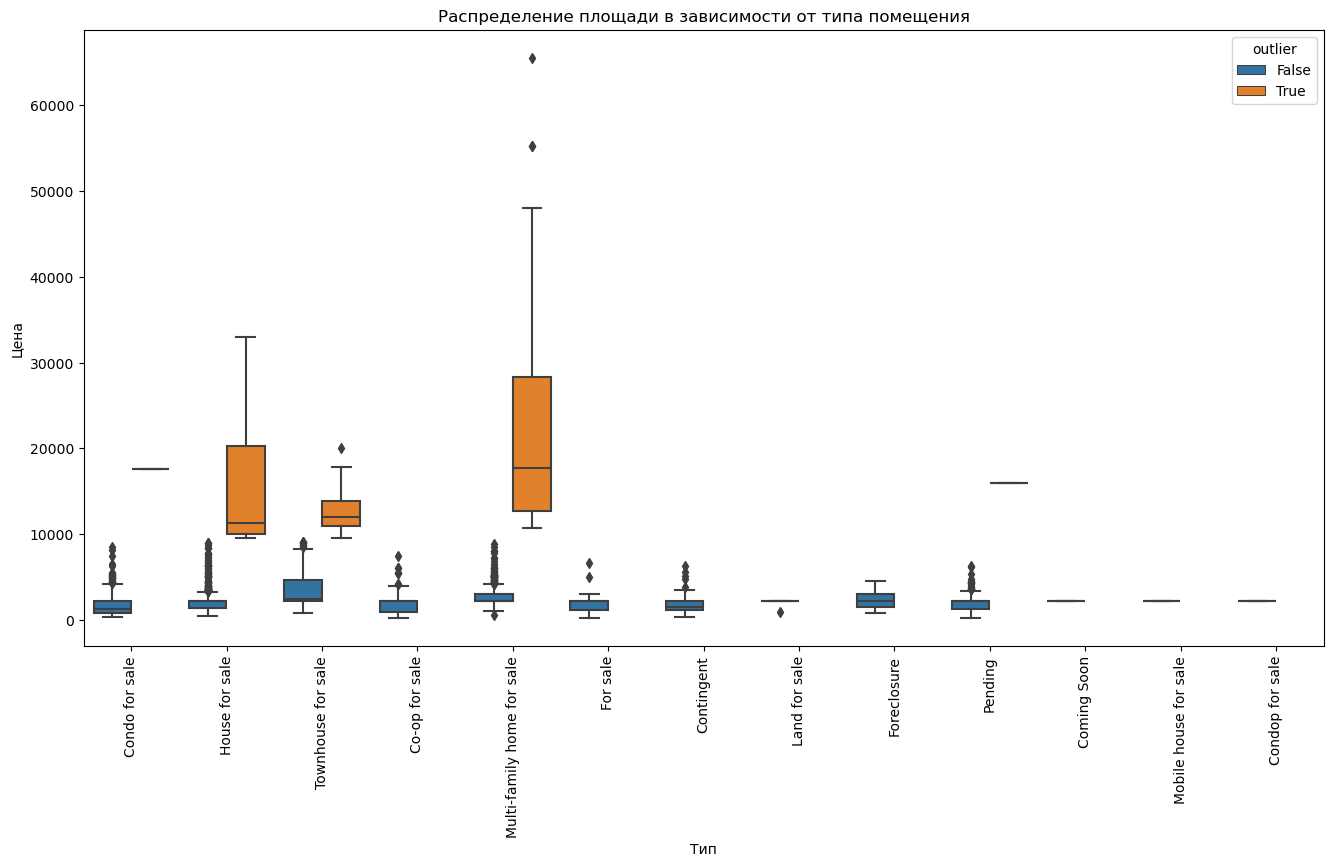

In [138]:
ny_housing['dev'] = (ny_housing['PROPERTYSQFT']-ny_housing['PROPERTYSQFT'].mean()).abs()
ny_housing['std'] = ny_housing['PROPERTYSQFT'].std()

ny_housing['outlier'] = ny_housing['dev']>3*ny_housing['std']


plt.figure(figsize=(16, 8))

sns.boxplot(x='TYPE', y='PROPERTYSQFT', hue='outlier', data=ny_housing)
plt.title('Распределение площади в зависимости от типа помещения')
plt.xlabel('Тип')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.show()

## Задание 2.4 Выделение выбросов
Мы нашли значение, после которого все наши наблюдения можно назвать выбросами.

Подсветите их. Для этого создайте scatter plot (столбцы PROPERTYSQFT и PRICE) в котором все точки выше этого значения PROPERTYSQFT будут помечены красным цветом.

После этого удалите эти значения из датасета (сортировка по переменной PROPERTYSQFT).

Отлично, теперь можем перейти к построению простой модели.

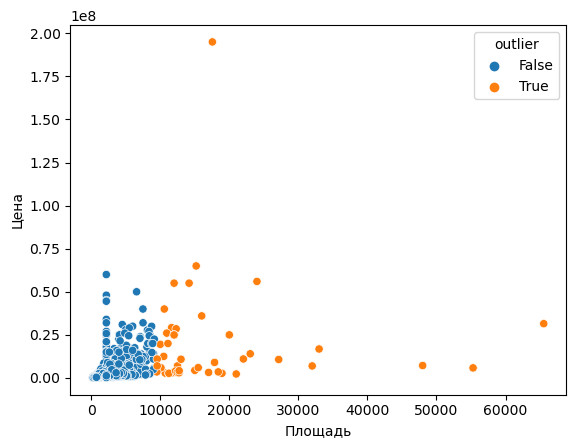

In [149]:
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=ny_housing, hue='outlier')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()

# Задание 3. Создание простой модели, визуализация результатов работы алгоритма

## Задание 3.1 Создание модели парной регрессии
В рамках других курсах вы проходили довольно много различных моделей и хорошо в них ориентируйтесь. Давайте сейчас попробуем посмотреть, в чем нам может помочь визуализация при интерпретации моделей.

Используя любую удобную для вас библиотеку, создайте модель простейшей парной регрессии. В качестве зависимой переменной используйте PRICE, в качестве независимой - PROPERTYSQFT. Полученные коэффициенты выведите и кратко опишите (логичным ли получился результат?)

In [152]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(ny_housing[['PROPERTYSQFT']].values, ny_housing['PRICE'].values)

print(f"Коэффициент: {model.coef_[0]}")
print(f"Смещение: {model.intercept_}")

Коэффициент: 846.3128969645385
Смещение: 62893.53354391456


## Задание 3.2 Визуализация результата
Когда мы работаем с парной регрессией, нам интересно отобразить полученные результаты на графике и визуально оценить их.

Создайте scatter plot, где по оси x будет находится PROPERTYSQFT, а по оси y - PRICE. Добавьте на этот график прямую регрессионного уравнения, которая у нас получилась.

Ура! Анализ завершен. Мы проделали полный цикл работы аналитика от получения датасета до создания простейшей модели. В следующий раз мы познакомимся с более продвинутыми способами использования визуализаций в анализе. Stay tuned :)

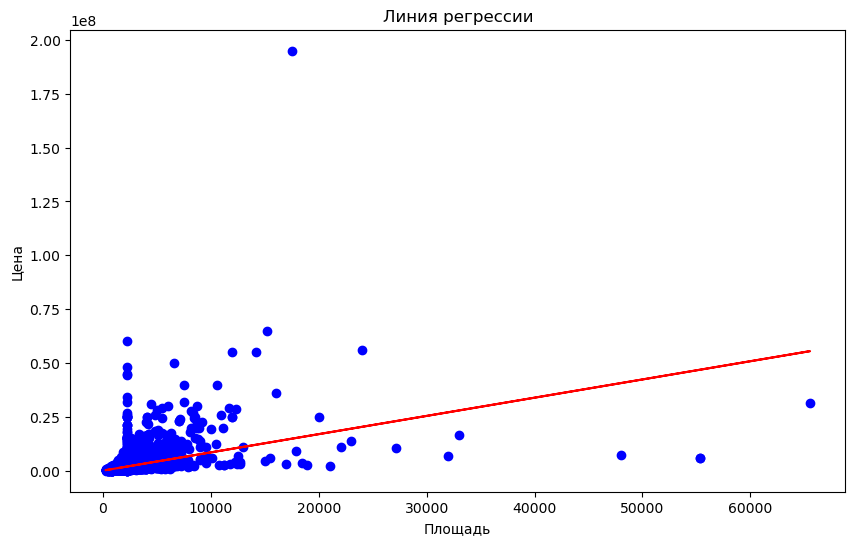

In [154]:
# Визуализация результатов регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b')
plt.plot(X, model.predict(X), c='r')
plt.title('Линия регрессии')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()